In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, fetch_openml
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)  

In [2]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, 
                                                                  test_size=0.20, random_state=seed, shuffle=True)

In [3]:
#dataset exploration on fashion mnist dataset
print(X_tr.shape)
print(y_tr.shape)

print(X_val.shape)
print(y_val.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


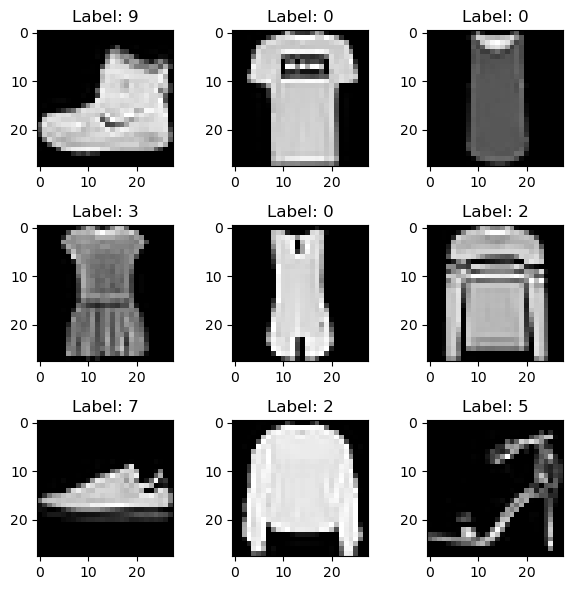

In [4]:
# Some default settings for our plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Create a figure with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(6, 6))  

### YOUR CODE STARTS HERE ###

for i in range(9):
    reshaped = X_train[i].reshape((28, 28))
    subplot = axes[i//3, i%3].imshow(reshaped)
    axes[i//3, i%3].set_title(f"Label: {y_train[i]}")
    
fig.tight_layout()

Training set error: 0.6424375
Testing set error: 0.646


[Text(0.5, 0.8333333333333334, 'X[207] <= 7.5\ngini = 0.9\nsamples = 48000\nvalue = [4790, 4849, 4786, 4806, 4756, 4772, 4806, 4800, 4807\n4828]'),
 Text(0.25, 0.5, 'X[599] <= 82.5\ngini = 0.732\nsamples = 15719\nvalue = [102, 20, 64, 120, 22, 4484, 71, 4786, 1482, 4568]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.579\nsamples = 8396\nvalue = [35, 9, 21, 22, 13, 3349, 45, 4267, 198, 437]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.622\nsamples = 7323\nvalue = [67, 11, 43, 98, 9, 1135, 26, 519, 1284, 4131]'),
 Text(0.75, 0.5, 'X[546] <= 6.5\ngini = 0.86\nsamples = 32281\nvalue = [4688, 4829, 4722, 4686, 4734, 288, 4735, 14, 3325\n260]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.146\nsamples = 4389\nvalue = [36, 4053, 57, 31, 22, 88, 40, 1, 60, 1]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.845\nsamples = 27892\nvalue = [4652, 776, 4665, 4655, 4712, 200, 4695, 13, 3265\n259]')]

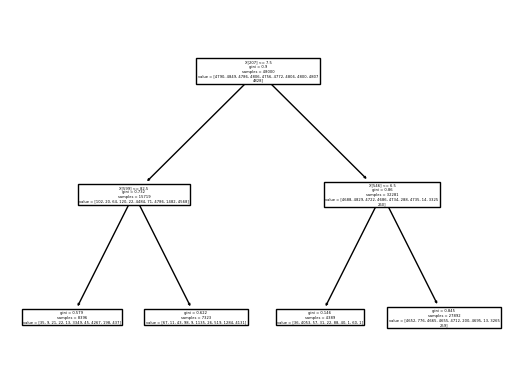

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=2, random_state=seed)
tree.fit(X_tr, y_tr)

train_predicted = tree.predict(X_tr)
print(f"Training set error: {1 - accuracy_score(train_predicted ,y_tr)}")

test_predicted = tree.predict(X_val)
print(f"Testing set error: {1 - accuracy_score(test_predicted ,y_val)}")

plot_tree(tree)

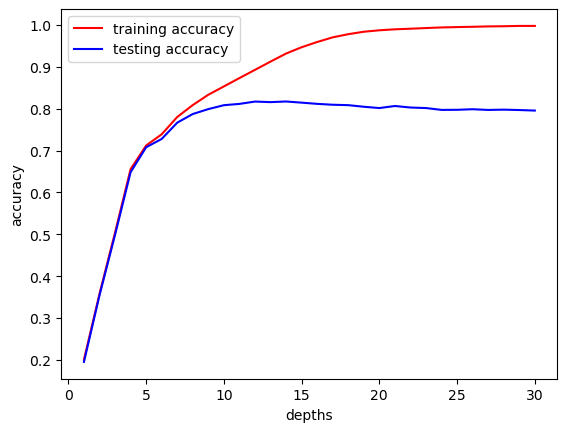

Best value for depth: 14
Corresponding validation set accuracy score: 0.8174166666666667


In [9]:
"""FINDING THE BEST VALUE FOR DEPTH PARAMETER"""
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
train_accuracies = []
test_accuracies = []

best_depth = 0 #currently set to default
best_test_accuracy = 0
for num in depths:
    tree = DecisionTreeClassifier(max_depth=num, random_state=seed)
    tree.fit(X_tr, y_tr)
    test_accuracy = accuracy_score(tree.predict(X_val), y_val)
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_depth = num
    train_accuracies.append(accuracy_score(tree.predict(X_tr), y_tr))
    test_accuracies.append(test_accuracy)
    
plt.plot(depths, train_accuracies, 'r', label='training accuracy')
plt.plot(depths, test_accuracies, 'b', label='testing accuracy')
plt.xlabel('depths')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print("Best value for depth:", best_depth)
print("Corresponding validation set accuracy score:", best_test_accuracy)

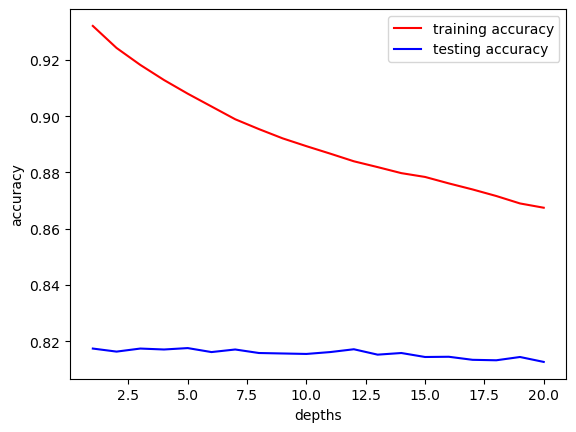

Best value for min_leaf_sample: 5
Corresponding validation set accuracy score: 0.8175833333333333


In [12]:
"""FINDING THE BEST VALUE FOR MIN_LEAF_SAMPLE WITH OUR DEPTH PARAMETER SET"""
min_leaf_samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
train_accuracies = []
test_accuracies = []

best_min_leaf = 1 #1 is our default
best_test_accuracy = 0

for num in min_leaf_samples:
    tree = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf=num, random_state=seed)
    tree.fit(X_tr, y_tr)
    test_accuracy = accuracy_score(tree.predict(X_val), y_val)
    if test_accuracy > best_test_accuracy:
        best_min_leaf = num
        best_test_accuracy = test_accuracy
    train_accuracies.append(accuracy_score(tree.predict(X_tr), y_tr))
    test_accuracies.append(test_accuracy)
    
plt.plot(min_leaf_samples, train_accuracies, 'r', label='training accuracy')
plt.plot(min_leaf_samples, test_accuracies, 'b', label='testing accuracy')
plt.xlabel('depths')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print("Best value for min_leaf_sample:", best_min_leaf)
print("Corresponding validation set accuracy score:", best_test_accuracy)

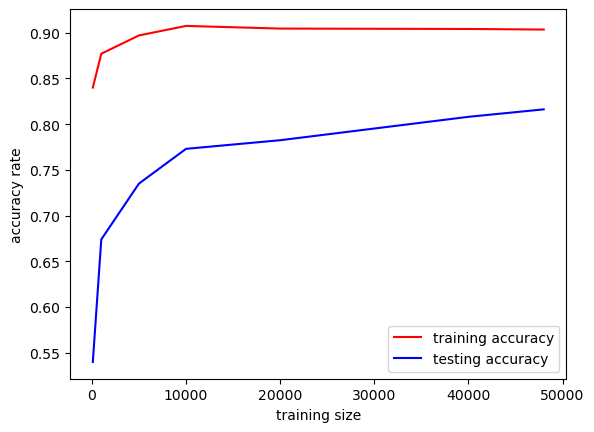

Best training size: 48000
Highest accuracy: 0.8161666666666667


In [13]:
"""FINDING THE BEST TRAINING SET SIZE FOR OUR DATA"""
n_tr = [100, 1000, 5000, 10000, 20000, 40000, 48000]
train_error = []
test_error = []

best_training_size = 0
highest_accuracy = 0

for i in n_tr:
    tree = DecisionTreeClassifier(max_depth=14, min_samples_leaf = 6, random_state=seed)
    tree.fit(X_tr[0:i], y_tr[0:i])
    accuracy = tree.score(X_val[0:i], y_val[0:i])
    if accuracy > highest_accuracy:
        best_training_size = i
        highest_accuracy = accuracy
        
    train_error.append(tree.score(X_tr[0:i], y_tr[0:i]))
    test_error.append(tree.score(X_val[0:i], y_val[0:i]))
    
plt.plot(n_tr, train_error, 'r', label='training accuracy')
plt.plot(n_tr, test_error, 'b', label='testing accuracy')
plt.xlabel('training size')
plt.ylabel('accuracy rate')
plt.legend()
plt.show()

print("Best training size:", best_training_size)
print("Highest accuracy:", highest_accuracy)

In [15]:
"""FINAL ACCURACY SCORE"""
tree = DecisionTreeClassifier(max_depth=14, min_samples_leaf = 6, random_state=seed)
tree.fit(X_train, y_train)
accuracy = tree.score(X_test, y_test)
print(accuracy)

0.8124
